In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

carpeta_origen = '../csv/'
archivo_datos_completos_bsas = 'datos_minsal_completos_bsas.csv'
columnas_con_fechas = [8,9,11,13,15,22,24]
ruta = carpeta_origen + archivo_datos_completos_bsas
datos_completos_bsas = pd.read_csv(ruta, parse_dates=columnas_con_fechas, infer_datetime_format=True)


In [8]:
municipio = 'General Pueyrredón'
datos_municipio = datos_completos_bsas.loc[datos_completos_bsas['residencia_departamento_nombre']==municipio]
datos_municipio

,id_evento_caso,sexo,edad,edad_años_meses,residencia_pais_nombre,residencia_provincia_nombre,residencia_departamento_nombre,carga_provincia_nombre,fecha_inicio_sintomas,fecha_apertura,...,carga_provincia_id,origen_financiamiento,clasificacion,clasificacion_resumen,residencia_provincia_id,fecha_diagnostico,residencia_departamento_id,ultima_actualizacion,clasificacion_simple,edad_actual_anios
54,1000170,F,80.0,Años,Argentina,Buenos Aires,General Pueyrredón,Buenos Aires,2020-05-29,2020-06-01,...,6,Privado,Caso Descartado,Descartado,6,2020-06-01,357,2020-09-21,NaN,80.0
71,1000233,F,37.0,Años,Argentina,Buenos Aires,General Pueyrredón,Buenos Aires,NaT,2020-06-01,...,6,Público,Caso Descartado,Descartado,6,2020-06-01,357,2020-09-21,NaN,37.0
86,1000278,M,30.0,Años,Argentina,Buenos Aires,General Pueyrredón,Buenos Aires,2020-05-30,2020-06-01,...,6,Privado,Caso Descartado,Descartado,6,2020-06-01,357,2020-09-21,NaN,30.0
110,1000351,F,50.0,Años,Argentina,Buenos Aires,General Pueyrredón,Buenos Aires,2020-06-01,2020-06-01,...,6,Privado,Caso Descartado,Descartado,6,2020-06-01,357,2020-09-21,NaN,50.0
344,1001186,M,39.0,Años,Argentina,Buenos Aires,General Pueyrredón,Buenos Aires,NaT,2020-06-01,...,6,Privado,Caso Descartado,Descartado,6,2020-06-01,357,2020-09-21,NaN,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
694160,998067,M,61.0,Años,Argentina,Buenos Aires,General Pueyrredón,Buenos Aires,2020-05-28,2020-05-31,...,6,Privado,Caso Descartado,Descartado,6,2020-06-02,357,2020-09-21,NaN,61.0
694376,998714,F,30.0,Años,Argentina,Buenos Aires,General Pueyrredón,Buenos Aires,2020-05-28,2020-06-01,...,6,Privado,Caso confirmado por laboratorio - No Activo po...,Confirmado,6,2020-06-02,357,2020-09-21,Recuperado,30.0
694430,998889,F,87.0,Años,Argentina,Buenos Aires,General Pueyrredón,Buenos Aires,2020-05-29,2020-06-01,...,6,Privado,Caso Descartado,Descartado,6,2020-06-01,357,2020-09-21,NaN,87.0
694497,999101,F,65.0,Años,Argentina,Buenos Aires,General Pueyrredón,Buenos Aires,2020-05-29,2020-06-01,...,6,Público,Caso Descartado,Descartado,6,2020-06-01,357,2020-09-21,NaN,65.0


In [12]:
plt.plot(datos_municipio['fecha_apertura'], datos_municipio['edad_actual_anios'], 'o')


Error in callback <function flush_figures at 0x000000F9810E6620> (for post_execute):


KeyboardInterrupt: 

In [27]:
tabla_edades = datos_municipio.pivot_table(
    index=['fecha_apertura'], values='edad_actual_anios',
    fill_value=0, aggfunc=np.mean
)
tabla_edades

,edad_actual_anios
fecha_apertura,
2020-02-27,63.000000
2020-03-12,72.000000
2020-03-13,60.500000
2020-03-16,51.000000
2020-03-17,34.500000
...,...
2020-09-17,40.107050
2020-09-18,41.360870
2020-09-19,41.462243


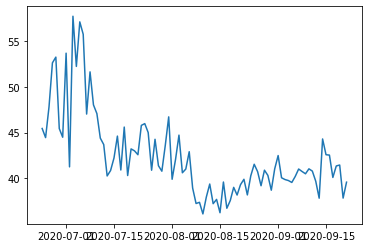

In [24]:
tabla_edades_ultimos_dias = tabla_edades.tail(90)

plt.plot(tabla_edades_ultimos_dias.index, tabla_edades_ultimos_dias['edad_actual_anios'])


In [40]:
datos_municipio['casos'] = 1
tabla_casos = datos_municipio.pivot_table(
    index=['fecha_apertura'], 
    #columns='clasificacion_resumen', 
    values='casos',
    fill_value=0, aggfunc=np.sum
)
tabla_casos

,casos
fecha_apertura,
2020-02-27,1
2020-03-12,1
2020-03-13,4
2020-03-16,1
2020-03-17,2
...,...
2020-09-17,383
2020-09-18,460
2020-09-19,437


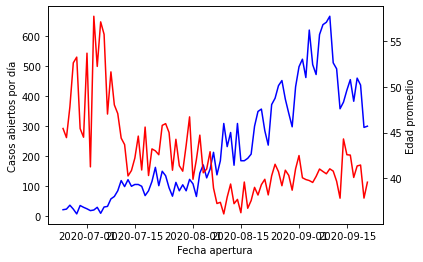

In [42]:
tabla_casos_ultimos_dias = tabla_casos.tail(90)

#plt.plot(tabla_casos_ultimos_dias.index, tabla_casos_ultimos_dias['Confirmado'])
#plt.plot(tabla_edades_ultimos_dias.index, tabla_edades_ultimos_dias['edad_actual_anios'], secondary_y=True)

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(tabla_casos_ultimos_dias.index, tabla_casos_ultimos_dias['casos'], color='b')
ax2.plot(tabla_edades_ultimos_dias.index, tabla_edades_ultimos_dias['edad_actual_anios'], color='r')

ax1.set_xlabel('Fecha apertura')
ax1.set_ylabel('Casos abiertos por día')
ax2.set_ylabel('Edad promedio')

plt.show()


In [43]:
datos_municipio['casos'] = 1
tabla_financiamiento = datos_municipio.pivot_table(
    index=['fecha_apertura'], 
    columns='origen_financiamiento', 
    values='casos',
    fill_value=0, aggfunc=np.sum
)
tabla_financiamiento

origen_financiamiento,Privado,Público
fecha_apertura,,
2020-02-27,0,1
2020-03-12,0,1
2020-03-13,4,0
2020-03-16,1,0
2020-03-17,1,1
...,...,...
2020-09-17,282,101
2020-09-18,323,137
2020-09-19,232,205


In [46]:
tabla_edades_financiamiento = datos_municipio.pivot_table(
    index=['fecha_apertura'], 
    columns = 'origen_financiamiento',
    values='edad_actual_anios',
    fill_value=0, aggfunc=np.mean
)
tabla_edades_financiamiento

origen_financiamiento,Privado,Público
fecha_apertura,,
2020-02-27,0.000000,63.000000
2020-03-12,0.000000,72.000000
2020-03-13,60.500000,0.000000
2020-03-16,51.000000,0.000000
2020-03-17,65.000000,4.000000
...,...,...
2020-09-17,42.652482,33.000000
2020-09-18,42.832817,37.890511
2020-09-19,43.827586,38.785366


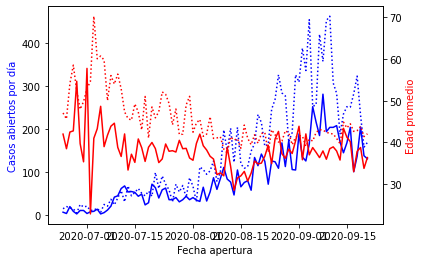

In [48]:
tabla_financiamiento_ultimos_dias = tabla_financiamiento.tail(90)
tabla_edades_financiamiento_ultimos_dias = tabla_edades_financiamiento.tail(90)

#plt.plot(tabla_casos_ultimos_dias.index, tabla_casos_ultimos_dias['Confirmado'])
#plt.plot(tabla_edades_ultimos_dias.index, tabla_edades_ultimos_dias['edad_actual_anios'], secondary_y=True)

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(tabla_financiamiento_ultimos_dias.index, tabla_financiamiento_ultimos_dias['Privado'], ':', color='b')
ax1.plot(tabla_financiamiento_ultimos_dias.index, tabla_financiamiento_ultimos_dias['Público'], '-', color='b')
ax2.plot(tabla_financiamiento_ultimos_dias.index, tabla_edades_financiamiento_ultimos_dias['Privado'], ':', color='r')
ax2.plot(tabla_financiamiento_ultimos_dias.index, tabla_edades_financiamiento_ultimos_dias['Público'], '-', color='r')

ax1.set_xlabel('Fecha apertura')
ax1.set_ylabel('Casos abiertos por día', color='b')
ax2.set_ylabel('Edad promedio', color='r')

plt.show()

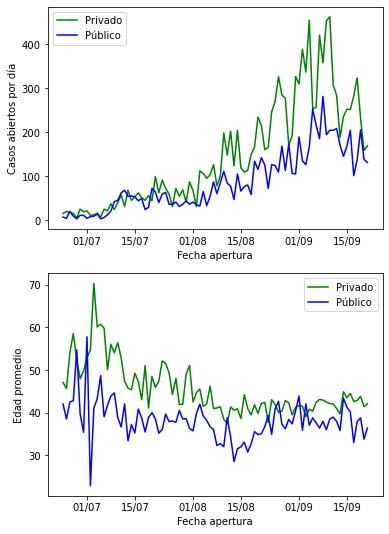

In [59]:
import matplotlib.dates as mdates

fig, axes = plt.subplots(2,1,figsize=(6,9))
ax1 = axes[0]
ax2 = axes[1]

ax1.plot(tabla_financiamiento_ultimos_dias.index, tabla_financiamiento_ultimos_dias['Privado'], '-', color='g', label='Privado')
ax1.plot(tabla_financiamiento_ultimos_dias.index, tabla_financiamiento_ultimos_dias['Público'], '-', color='b', label='Público')
ax2.plot(tabla_financiamiento_ultimos_dias.index, tabla_edades_financiamiento_ultimos_dias['Privado'], '-', color='g', label='Privado')
ax2.plot(tabla_financiamiento_ultimos_dias.index, tabla_edades_financiamiento_ultimos_dias['Público'], '-', color='b', label='Público')

ax1.set_xlabel('Fecha apertura')
ax1.set_ylabel('Casos abiertos por día')
ax2.set_xlabel('Fecha apertura')
ax2.set_ylabel('Edad promedio')

ax1.legend(loc='best')
ax2.legend(loc='best')

# formato de fecha
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m'))
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m'))

plt.show()

In [109]:
datos_municipio['rango_edad'] = '25-59' 
datos_municipio.loc[datos_municipio['edad_actual_anios']>=60, 'rango_edad'] = '60+' 
datos_municipio.loc[datos_municipio['edad_actual_anios']< 25, 'rango_edad'] = '0-24' 

tabla_rangos_edad = datos_municipio.pivot_table(
    index=['fecha_apertura'], 
    columns = ['rango_edad','origen_financiamiento'],
    values='casos',
    fill_value=0, aggfunc=np.sum
)
tabla_rangos_edad


rango_edad               0-24           25-59             60+        
origen_financiamiento Privado Público Privado Público Privado Público
fecha_apertura                                                       
2020-02-27                  0       0       0       0       0       1
2020-03-12                  0       0       0       0       0       1
2020-03-13                  0       0       2       0       2       0
2020-03-16                  0       0       1       0       0       0
2020-03-17                  0       1       0       0       1       0
...                       ...     ...     ...     ...     ...     ...
2020-09-17                 26      31     211      59      45      11
2020-09-18                 29      30     244      89      50      18
2020-09-19                 21      36     170     141      41      28
2020-09-20                 20      37     118      89      20      12
2020-09-21                 19      37     129      77      21      17

[192 rows x 6 columns]

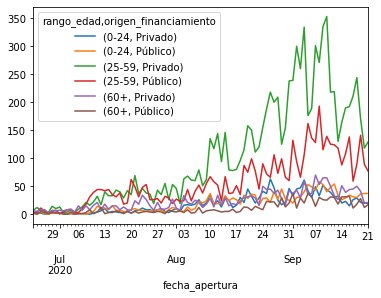

In [110]:
tabla_rangos_edad.tail(90).plot()

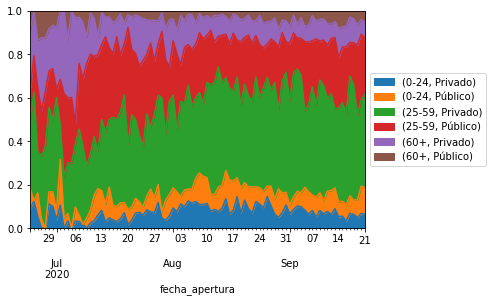

In [111]:
tabla_rangos_edad_porcentaje = tabla_rangos_edad.divide(tabla_rangos_edad.sum(axis=1), axis=0)

tabla_rangos_edad_porcentaje.tail(90).plot.area()
plt.gca().set_ylim(bottom=0.0, top=1.0)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))


In [112]:
municipios = ['Ayacucho', 'Balcarce', 'General Alvarado', 'General Guido', 'General Juan Madariaga', 'General Lavalle', 'General Pueyrredón', 'La Costa', 'Lobería', 'Maipú', 'Mar Chiquita', 'Necochea', 'Pinamar', 'San Cayetano', 'Tandil', 'Villa Gesell']

datos_region = datos_completos_bsas.loc[datos_completos_bsas['residencia_departamento_nombre'].isin(municipios)]
datos_region


,id_evento_caso,sexo,edad,edad_años_meses,residencia_pais_nombre,residencia_provincia_nombre,residencia_departamento_nombre,carga_provincia_nombre,fecha_inicio_sintomas,fecha_apertura,...,carga_provincia_id,origen_financiamiento,clasificacion,clasificacion_resumen,residencia_provincia_id,fecha_diagnostico,residencia_departamento_id,ultima_actualizacion,clasificacion_simple,edad_actual_anios
48,1000139,M,46.0,Años,Argentina,Buenos Aires,La Costa,Buenos Aires,2020-05-28,2020-06-01,...,6,Público,Caso Descartado,Descartado,6,2020-06-01,420,2020-09-21,NaN,46.0
54,1000170,F,80.0,Años,Argentina,Buenos Aires,General Pueyrredón,Buenos Aires,2020-05-29,2020-06-01,...,6,Privado,Caso Descartado,Descartado,6,2020-06-01,357,2020-09-21,NaN,80.0
71,1000233,F,37.0,Años,Argentina,Buenos Aires,General Pueyrredón,Buenos Aires,NaT,2020-06-01,...,6,Público,Caso Descartado,Descartado,6,2020-06-01,357,2020-09-21,NaN,37.0
86,1000278,M,30.0,Años,Argentina,Buenos Aires,General Pueyrredón,Buenos Aires,2020-05-30,2020-06-01,...,6,Privado,Caso Descartado,Descartado,6,2020-06-01,357,2020-09-21,NaN,30.0
110,1000351,F,50.0,Años,Argentina,Buenos Aires,General Pueyrredón,Buenos Aires,2020-06-01,2020-06-01,...,6,Privado,Caso Descartado,Descartado,6,2020-06-01,357,2020-09-21,NaN,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
694430,998889,F,87.0,Años,Argentina,Buenos Aires,General Pueyrredón,Buenos Aires,2020-05-29,2020-06-01,...,6,Privado,Caso Descartado,Descartado,6,2020-06-01,357,2020-09-21,NaN,87.0
694472,999015,F,63.0,Años,Argentina,Buenos Aires,Lobería,Buenos Aires,NaT,2020-06-01,...,6,Público,Caso Descartado,Descartado,6,2020-06-01,476,2020-09-21,NaN,63.0
694497,999101,F,65.0,Años,Argentina,Buenos Aires,General Pueyrredón,Buenos Aires,2020-05-29,2020-06-01,...,6,Público,Caso Descartado,Descartado,6,2020-06-01,357,2020-09-21,NaN,65.0
694650,999602,F,2.0,Años,Argentina,Buenos Aires,General Pueyrredón,Buenos Aires,2020-05-31,2020-06-01,...,6,Público,Caso Descartado,Descartado,6,2020-06-01,357,2020-09-21,NaN,2.0


In [113]:
datos_region['casos'] = 1
datos_region['mdp_o_no'] = 'no mdp'
datos_region.loc[datos_region['residencia_departamento_nombre']=='General Pueyrredón', 'mdp_o_no'] = 'mdp'
tabla_mdp_no_mdp = datos_region.pivot_table(
    index=['fecha_apertura'], 
    columns='mdp_o_no', 
    values='casos',
    fill_value=0, aggfunc=np.sum
)
tabla_mdp_no_mdp

mdp_o_no,mdp,no mdp
fecha_apertura,,
2020-02-27,1,0
2020-03-09,0,1
2020-03-12,1,1
2020-03-13,4,2
2020-03-14,0,1
...,...,...
2020-09-17,383,229
2020-09-18,460,355
2020-09-19,437,254


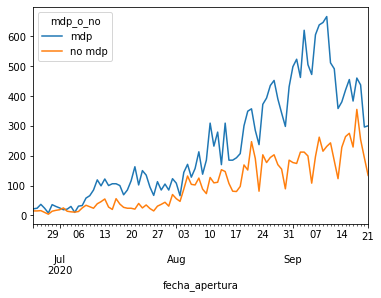

In [114]:
tabla_mdp_no_mdp.tail(90).plot()